**Topic which are covered**
* What is means to reuse pre-trained layer in your model.
* What it is such a powerful technique?
* Example in TensorBoard.




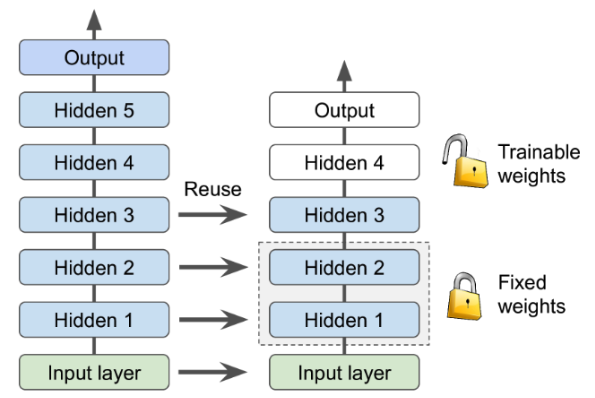

**Pre- Trained layer?**

**Benefits**
* Save time and computational Resources
* Better Generalization
* Improved Accuracy with Limited data.


In [1]:
# Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
# Random data
num_sample = 100
img_height, img_width = 224, 224
num_classes = 2

X = np.random.rand(num_sample, img_height, img_width, 3)
y = np.random.randint(0, 2, num_sample)

y_random_one_hot = tf.keras.utils.to_categorical(y, num_classes)

In [3]:
# load pre-trained ResNe50 model
base_model = ResNet50(weights='imagenet', include_top=False)

In [4]:
# Freeze the base model layer
base_model.trainable = False

In [5]:
# Add custom classification layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x) # assuming 10 classes

In [6]:
# model
model = Model(inputs=base_model.input, outputs=predictions)

In [7]:
# compile
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │ 256)                   │                │                        │
├──────────────────────

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
# load custom dataset using ImageDatagenerator
datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, horizontal_flip=True)
train_generator = datagen.flow(X,y_random_one_hot, batch_size=32, )

In [10]:
# train the model using the random data
history = model.fit(train_generator, epochs=10, steps_per_epoch=num_sample//32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.4596 - loss: 1.3992
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5000 - loss: 0.7633 
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.4102 - loss: 1.4418
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2500 - loss: 1.0800
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.4788 - loss: 0.8393
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3125 - loss: 0.8522
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4622 - loss: 0.7512
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7500 - loss: 0.5858
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.4853 - loss: 0.8843
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2812 - loss: 0.7145


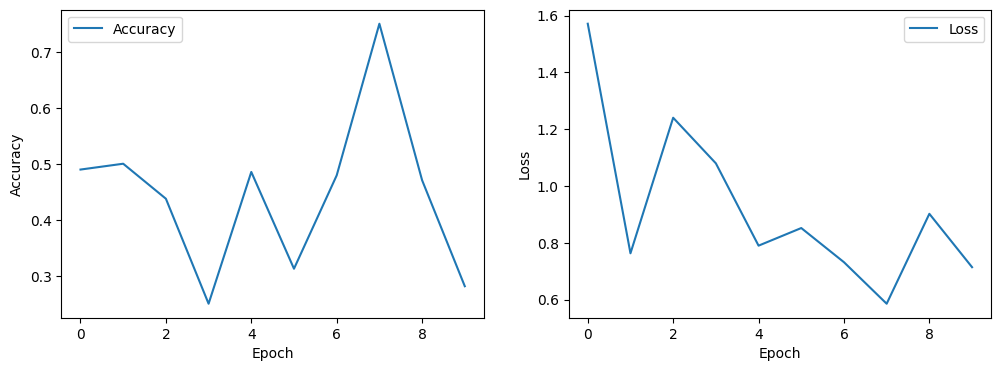

In [13]:
# Visualize
#Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
